# Exercise: Visualisation in Python


## Exercises

We are the team managers of a soccer club and are keen on leveraging data to gain insights into the performance of our players. The dataset at our disposal contains valuable information about each player's skills, age, and overall rating. As managers, we have specific questions in mind that will help us make informed decisions and strategies for the upcoming season.

Let's start by importing the libraries we're going to need and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("football_players.csv")
df

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,94,23,91,92,31,80,85,88,ST LW,Forward
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,85,26,87,73,28,59,90,85,RW,Forward
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,80,33,90,78,24,53,80,83,LW,Forward
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,87,38,77,89,45,80,84,88,ST,Forward
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,25,11,61,44,10,83,70,11,GK,GoalKeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,24,16,38,26,12,23,...,19,10,32,28,11,50,26,6,GK,GoalKeeper
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,13,13,25,32,12,47,17,12,GK,GoalKeeper
17978,J. Young,17,Scotland,46,66,26,60,77,41,50,...,42,14,51,33,17,32,37,33,ST,Forward
17979,J. Lundstram,18,England,46,57,46,58,74,43,45,...,43,47,58,49,48,46,51,25,CM,Midfielder


Let's change the following columns to numerical values.

In [7]:
cols = ['Age', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Exercise 1

Now that we've loaded the dataset, we are curious about how players from different nationalities perform on average. We want to compare the overall ratings across the countries producing the highest number of players. We decide to create a bar graph to compare the average overall ratings of players, specifically for the top five nationalities, **based on the total number of players per country**. This insight will help us identify potential strengths within our team.

Create a bar graph using `Matplotlib` to represent the average overall rating for players from the top five nationalities (**based on the number of players in each nationality**). Be sure to customise the graph as you see fit.


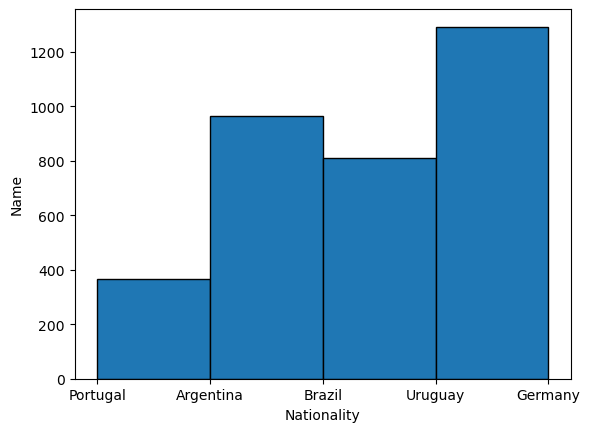

In [9]:
# insert code here
bin_edges = range(0,5)
plt.hist(df['Nationality'], histtype = 'bar', ec = 'black', bins=bin_edges)
plt.xlabel("Nationality")
plt.ylabel("Name")
plt.show()

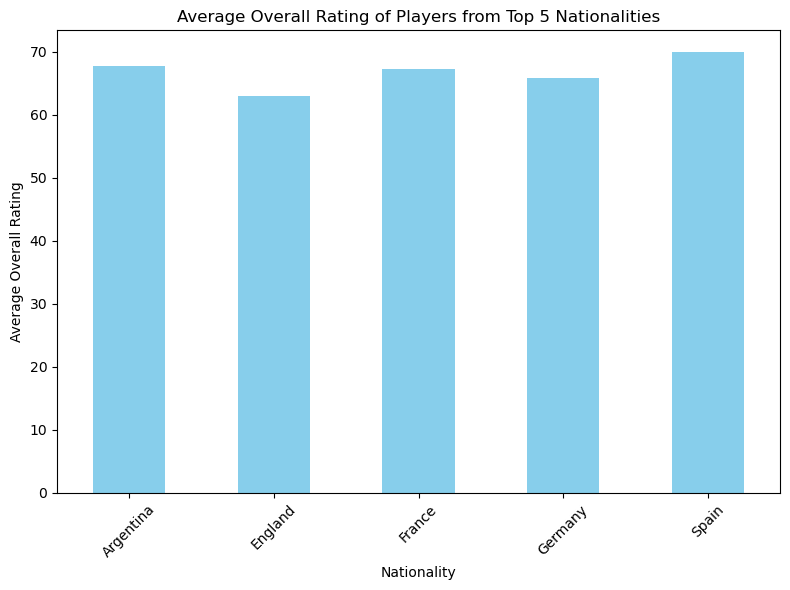

In [5]:

nationality_counts = df['Nationality'].value_counts()

top_5_nationalities = nationality_counts.head().index

top_5_avg_ratings = df[df['Nationality'].isin(top_5_nationalities)].groupby('Nationality')['Overall'].mean()

plt.figure(figsize=(8, 6))
top_5_avg_ratings.plot(kind='bar', color='skyblue')

plt.title('Average Overall Rating of Players from Top 5 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


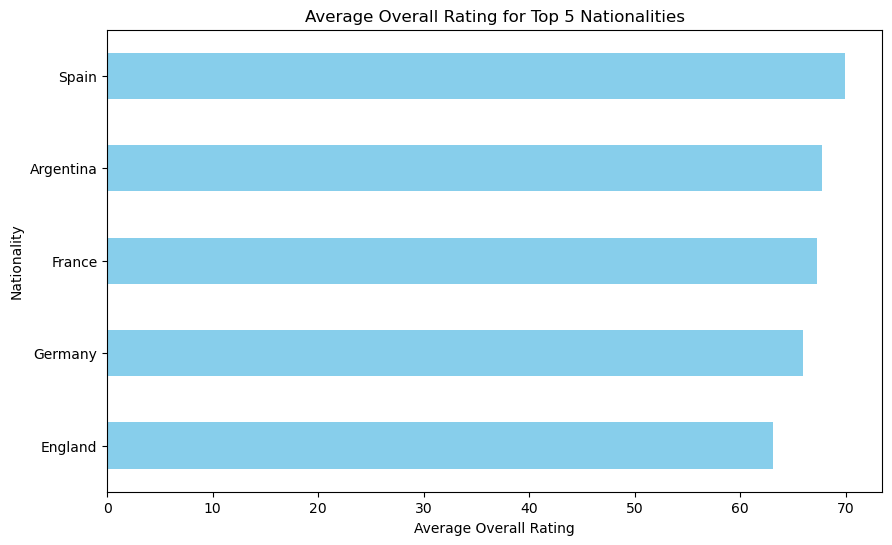

In [21]:
top_5_countries = df['Nationality'].value_counts().head().index

top_players_df = df[df['Nationality'].isin(top_5_countries)]

avg_ratings = top_players_df.groupby('Nationality')['Overall'].mean()

plt.figure(figsize=(10,6))
avg_ratings.sort_values().plot(kind = 'barh', color ='skyblue')
plt.title('Average Overall Rating for Top 5 Nationalities')
plt.xlabel('Average Overall Rating')
plt.ylabel('Nationality')
plt.show()

### Exercise 2

As we delve deeper into player analysis, we wonder about the age distribution of our team. A pie chart showcasing the percentage distribution of player ages will provide a clear picture. Understanding the age demographics helps us plan for the team's future and potential recruitment strategies. We have decided to categorise players into specific age groups, specifically `[15-19]`, `[20-24]`, `[25-29]`, `[30-34]`, and `[35+]`.

Generate a pie chart to visualise the percentage distribution of player ages. 

**Hint**: `pd.cut` is a function in the Pandas library designed for binning or categorising continuous data into discrete intervals, also known as bins. This function is particularly useful when dealing with numerical data that we want to group into meaningful ranges. We can use `pd.cut` to help us create a more interpretable representation of player ages by categorising them into specific age groups.

**Syntax**: 

`pd.cut(x, bins)`

* `x`: The input array or Series that we want to bin.
* `bins`: Defines the bin edges. It can be an integer specifying the number of equal-width bins or a sequence specifying the bin edges.

Use bins of `[15, 20, 25, 30, 35]` to categorise players into specific age groups before plotting the pie chart.


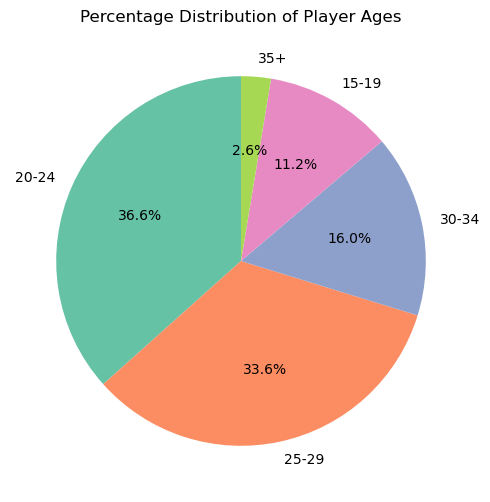

In [7]:
# insert code here

age_bins = [15, 20, 25, 30, 35, 100]  
age_labels = ['15-19', '20-24', '25-29', '30-34', '35+']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_distribution = df['Age Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
age_group_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Player Ages')
plt.ylabel('')  # Hide the y-label
plt.show()


### Exercise 3

To enhance our team's fitness and agility, we decide to explore how certain skills, like `Acceleration` and `Sprint speed`, vary across different age groups. A line graph depicting the trends will guide our training and conditioning strategies for players of different ages.

Create a line graph using `Matplotlib` to show the trend of average `Acceleration` and `Sprint speed` across different age groups. Customise the graph appropriately.

Assume that the age bins are defined as `[15, 20, 25, 30, 35]`.

C:\Users\Itiayo Gbadebo\AppData\Local\Temp\ipykernel_2540\2523440215.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_skills_by_age = df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()


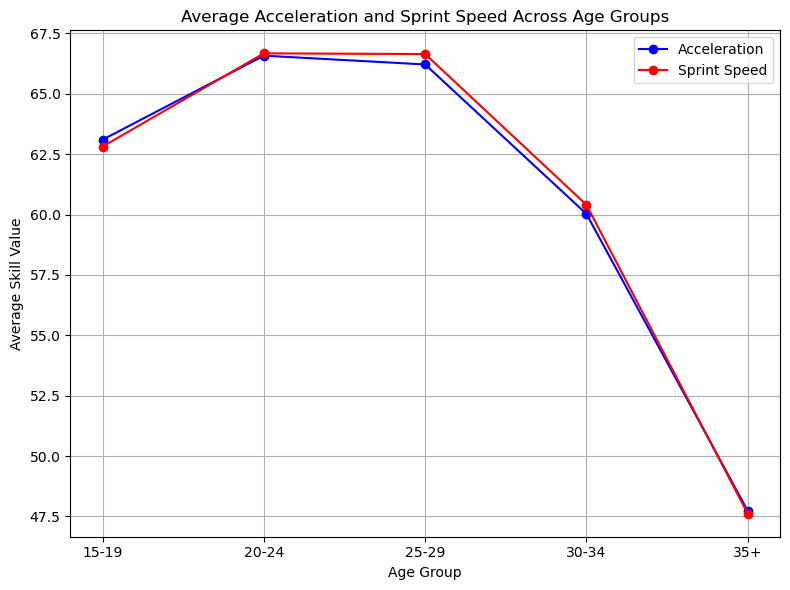

In [28]:
# insert code here
age_bins = [15, 20, 25, 30, 35, 100]  
age_labels = ['15-19', '20-24', '25-29', '30-34', '35+']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

avg_skills_by_age = df.groupby('Age Group')[['Acceleration', 'Sprint speed']].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_skills_by_age.index, avg_skills_by_age['Acceleration'], marker='o', label='Acceleration', color='b')
plt.plot(avg_skills_by_age.index, avg_skills_by_age['Sprint speed'], marker='o', label='Sprint Speed', color='r')

plt.title('Average Acceleration and Sprint Speed Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Skill Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Exercise 4

Focused on excellence, we narrow our analysis to players from the top three nationalities based on the highest average `Overall` rating. Slicing the dataset, we create a box plot to compare skill distributions, providing a detailed profile of the top-performing players.

Slice the dataset to only include players from the **top three nationalities** with the highest average `Overall` rating. Then, create a box plot using Seaborn to compare the distribution of specific skills, including `Dribbling`, `Short passing`, `Shot power`, and `Ball control` for players from these nations.

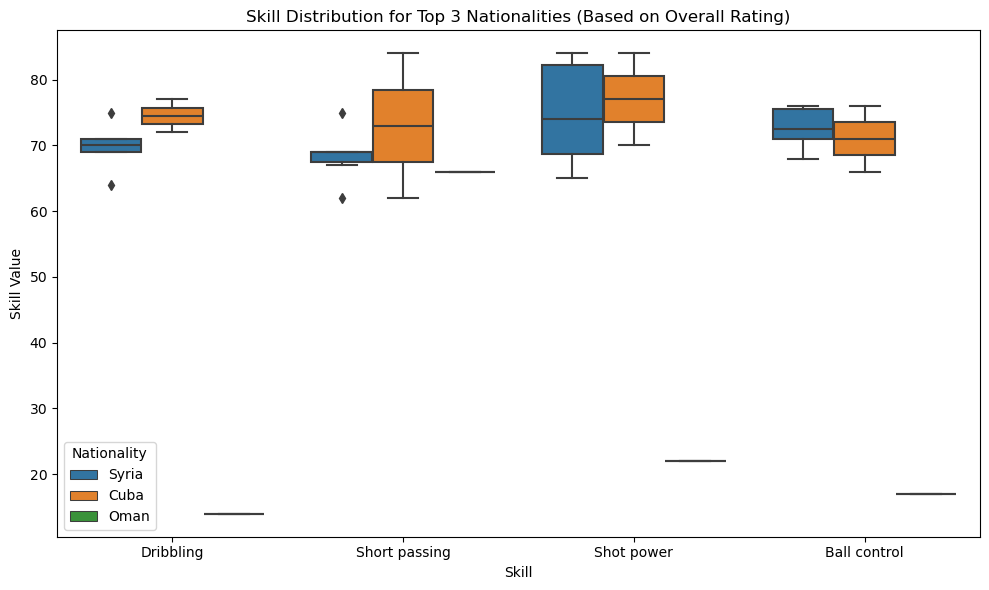

In [26]:
# insert code here
avg_rating_by_nation = df.groupby('Nationality')['Overall'].mean()

top_3_nationalities = avg_rating_by_nation.nlargest(3).index

top_3_df = df[df['Nationality'].isin(top_3_nationalities)]

plt.figure(figsize=(10, 6))

skills = ['Dribbling', 'Short passing', 'Shot power', 'Ball control']
melted_df = top_3_df.melt(id_vars='Nationality', value_vars=skills, var_name='Skill', value_name='Value')

sns.boxplot(x='Skill', y='Value', hue='Nationality', data=melted_df)

plt.title('Skill Distribution for Top 3 Nationalities (Based on Overall Rating)')
plt.xlabel('Skill')
plt.ylabel('Skill Value')
plt.legend(title='Nationality')
plt.tight_layout()

plt.show()


### Exercise 5

Embracing modern tools, we want to utilise Plotly to create an interactive visualisation. This dynamic plot will empower us to explore the intricate relationships between our categories. We also want to include hover information to add an extra layer of insight for more informed decision-making.

Implement an interactive visualisation using Plotly to allow users to explore the relationship between `Strength`, `Vision`, and the `Overall` rating using the **hover information** feature to allow the user to have an interactive view of the data.

Arrange the plot as follows:

* Place `Strength` on the x-axis.
* Place `Vision` on the y-axis.
* Colour-code the points to represent the `Overall` rating.
* Include a hover that has the name of the player as well as the  `Strength`, `Vision`, and `Overall` ratings for each player.

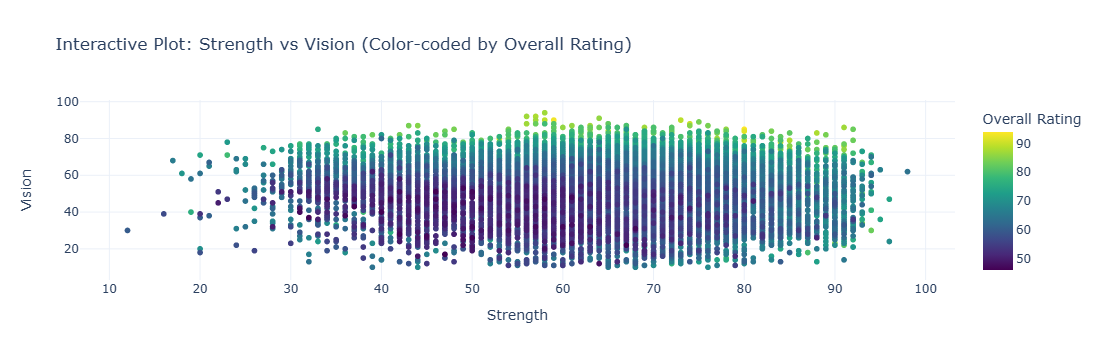

In [31]:
# insert code here
import plotly.express as px

# Step 1: Create an interactive scatter plot using Plotly
fig = px.scatter(
    df, 
    x='Strength', 
    y='Vision', 
    color='Overall', 
    hover_data=['Name', 'Strength', 'Vision', 'Overall'],
    title='Interactive Plot: Strength vs Vision (Color-coded by Overall Rating)',
    labels={
        'Strength': 'Strength',
        'Vision': 'Vision',
        'Overall': 'Overall Rating'
    },
    color_continuous_scale=px.colors.sequential.Viridis  # You can customize the color scale
)

# Step 2: Customize the layout
fig.update_layout(
    xaxis_title="Strength",
    yaxis_title="Vision",
    coloraxis_colorbar=dict(title="Overall Rating"),
    hovermode="closest",
    template="plotly_white"
)

# Step 3: Display the plot
fig.show()


# Summary

This exercise underscores the symbiotic relationship between data preparation and visualisation. Mastery of both facets empowers us to unleash the full potential of Python's visualisation libraries, creating impactful visuals that tell compelling data stories.

As we continue our data science journey, remember that proficiency in data preparation and visualisation techniques is a cornerstone for extracting actionable insights and making informed decisions. Keep honing these skills, explore diverse datasets, and embrace the creative possibilities that effective data visualisation affords.